1) Load in the dataset `https://d1pqsl2386xqi9.cloudfront.net/notebooks/Default.csv` into a pandas dataframe

In [2]:
import pandas as pd
import statsmodels.api as sm
from sklearn.cross_validation import KFold
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier as RF
from sklearn.neighbors import KNeighborsClassifier as KNN
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
from sklearn.utils import shuffle
from sklearn.metrics import roc_curve, auc
import pylab
from sklearn import svm
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import Ridge
from sklearn.ensemble import RandomForestClassifier
from mpl_toolkits.basemap import Basemap
import re
import pylab as plt
import seaborn
from sklearn.linear_model import LinearRegression
import numpy.random as nprnd
pd.set_option('display.max_columns', 500)
%matplotlib inline
import random
import matplotlib.pyplot as plt
from numpy import where
from IPython.display import Image

ModuleNotFoundError: No module named 'mpl_toolkits.basemap'

In [3]:
df = pd.read_csv('https://d1pqsl2386xqi9.cloudfront.net/notebooks/Default.csv', index_col=0)
df.head(10)

,default,student,balance,income
1,No,No,729.526495,44361.625074
2,No,Yes,817.180407,12106.134700
3,No,No,1073.549164,31767.138947
4,No,No,529.250605,35704.493935
5,No,No,785.655883,38463.495879
6,No,Yes,919.588530,7491.558572
7,No,No,825.513331,24905.226578
8,No,Yes,808.667504,17600.451344
9,No,No,1161.057854,37468.529288
10,No,No,0.000000,29275.268293


2) Convert `default` and `student` to categorical variables.

In [4]:
df_default=pd.get_dummies(df['default'])
df_default=df_default.drop(['No'],1)
df_default.rename(columns={'Yes':'default'}, inplace=True)
df_student=pd.get_dummies(df['student'])
df_student=df_student.drop(['No'],1)
df_student.rename(columns={'Yes':'student'}, inplace=True)
df_final=pd.concat([df_default,df_student,df[['balance','income']]],axis=1)
df_final.shape

(10000, 4)

In [5]:
df_final.head(10)

,default,student,balance,income
1,0,0,729.526495,44361.625074
2,0,1,817.180407,12106.134700
3,0,0,1073.549164,31767.138947
4,0,0,529.250605,35704.493935
5,0,0,785.655883,38463.495879
6,0,1,919.588530,7491.558572
7,0,0,825.513331,24905.226578
8,0,1,808.667504,17600.451344
9,0,0,1161.057854,37468.529288
10,0,0,0.000000,29275.268293


3) Make boxplots of all of the variables and a scatter plot of of (balance,income) with the color
of the outcome of `default` labeled red if yes and blue if no. 

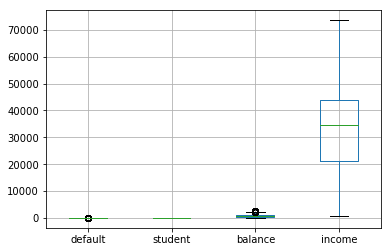

In [6]:
#box plot
df_final.boxplot()
plt.show()

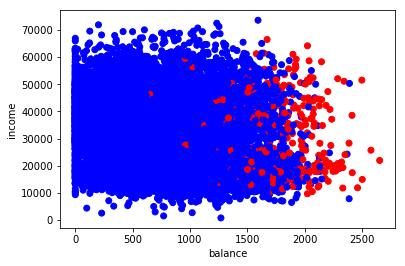

In [7]:
#scatter plot

x=df['balance']
y=df['income']
z=df['default']
fig, ax = plt.subplots()
colors = {'Yes':'red', 'No':'blue'}
ax.scatter(x, y, c=z.apply(lambda x: colors[x]))
plt.xlabel('balance')
plt.ylabel('income')
plt.show()

4) Train a model to predict if a student defaults on their loan or not using LogisticRegression based soley
on the `balance` and `income` variables. Plot the decision boundary in the scatter plot you made in 3) and compute the AUC ROC.

/Users/jingyayan/anaconda/lib/python3.6/site-packages/sklearn/utils/validation.py:526: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Coefficients of Decision Boundary are 0.005523 and 0.000019


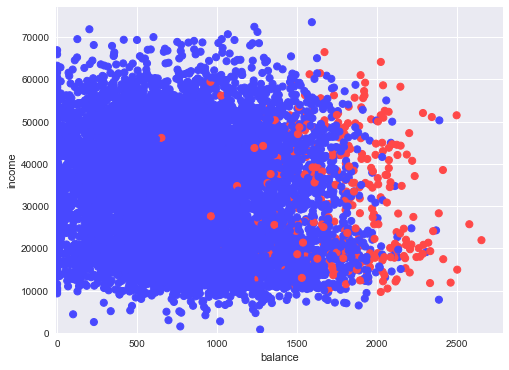

In [8]:
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.datasets import make_classification
import matplotlib.pyplot as plt
import seaborn as sns

data = pd.concat([df_final[['balance','income','default']]],axis=1)
cols = data.shape[1]
X = data.iloc[:,0:cols-1]
y = data.iloc[:,cols-1:cols]
X = np.array(X.values)
y = np.array(y.values)

clf = LogisticRegression(penalty='l1').fit(X, y)

print (('Coefficients of Decision Boundary are %f and %f') % (clf.coef_[0][0],clf.coef_[0][1]))

xx, yy = np.mgrid[-5:5:.01, -5:5:.01]
grid = np.c_[xx.ravel(), yy.ravel()]
probs = clf.predict_proba(grid)[:, 1].reshape(xx.shape)
f, ax = plt.subplots(figsize=(8, 6))
ax.contour(xx, yy, probs, levels=[.5], cmap="Greys", vmin=0, vmax=.6)

ax.scatter(X[100:,0], X[100:, 1], c=y[100:], s=50,
           cmap="bwr", vmin=-.2, vmax=1.2, 
           linewidth=1)
# ax.plot()

ax.set(xlabel="balance", ylabel="income")
plt.show()

/Users/jingyayan/anaconda/lib/python3.6/site-packages/sklearn/utils/validation.py:526: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Area under the ROC curve : 0.609821
Area under the ROC curve : 0.609792
Area under the ROC curve : 0.609864
Area under the ROC curve : 0.609864
Area under the ROC curve : 0.610164
Area under the ROC curve : 0.610078
Area under the ROC curve : 0.610136
Area under the ROC curve : 0.610193
Area under the ROC curve : 0.610193
Area under the ROC curve : 0.610222
Area under the ROC curve : 0.618055
Area under the ROC curve : 0.681593
Area under the ROC curve : 0.747079
Area under the ROC curve : 0.809815
Area under the ROC curve : 0.855711
Area under the ROC curve : 0.896409
Area under the ROC curve : 0.919951
Area under the ROC curve : 0.934600
Area under the ROC curve : 0.943464
Area under the ROC curve : 0.949393
Area under the ROC curve : 0.951541
Area under the ROC curve : 0.955622
Area under the ROC curve : 0.957541
Area under the ROC curve : 0.958486
Area under the ROC curve : 0.959159
Area under the ROC curve : 0.959675
Area under the ROC curve : 0.959646
Area under the ROC curve : 0

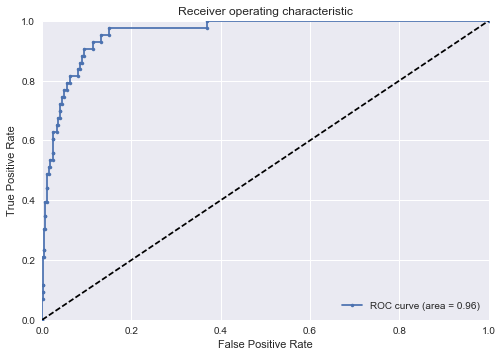

In [9]:
#AUC

# X are features and y is predictive variable - cancelled HD or not.
X = df_final[['balance', 'income']]
#y = df['y'].apply(lambda y : get_y(y))



# Scale columns for regression.
#scaler = StandardScaler()
#X = X.as_matrix().astype(np.float)
#X = scaler.fit_transform(X)

# Computes the AUC ROC of the classifier.
def generate_auc(X,y,clf_class,**kwargs):
    # Construct a kfolds object
    random_state = np.random.RandomState(0)
    # Construct training and testing set.
    X, y = shuffle(X, y, random_state=random_state)
    n_samples, n_features = X.shape
    half = int(n_samples/1.2)
    X_train, X_test = X[:half], X[half:]
    y_train, y_test = y[:half], y[half:]
    
    # Choose SVC classifier.
    classifier = clf_class(**kwargs)
    probas_ = classifier.fit(X_train, y_train).predict_proba(X_test)
    
    fpr, tpr, thresholds = roc_curve(y_test, probas_[:, 1])
    roc_auc = auc(fpr, tpr)
    print ("Area under the ROC curve : %f" % roc_auc)
    return fpr, tpr, roc_auc, thresholds

# Create linear regression object
alphas = np.logspace(-3,-1,30)

scores = []

for alpha in alphas:
    regr = LogisticRegression(C=alpha,penalty='l1')

    # Train the model using the training sets
    #regr.fit(X_train, y_train)
    fpr, tpr, roc_auc, thresholds= generate_auc(X,y,LogisticRegression,C=alpha,penalty='l1')
    scores.append(roc_auc)
plt.plot(alphas,scores)


# Generate ROC  for LR with l1 penalty and C=0.1
fpr,tpr,roc_auc, thresholds = generate_auc(X,y,LogisticRegression,C=0.1,penalty='l1')
def generate_ROCplot(fpr,tpr,label,roc_auc):
    plt.clf()
    plt.plot(fpr, tpr, '.-',label='ROC curve (area = %0.2f)' % roc_auc)
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.0])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic')
    plt.legend(loc="lower right")
    plt.show()
    
# Plots ROC
generate_ROCplot(fpr,tpr,'LR',roc_auc)

5) Repeat 4) but with the student variable included. Optimize using Ridge regression and plot the ranking of coefficients.  How does performance improve with the added variable?

/Users/jingyayan/anaconda/lib/python3.6/site-packages/sklearn/utils/validation.py:526: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Area under the ROC curve : 0.609678
Area under the ROC curve : 0.609749
Area under the ROC curve : 0.609978
Area under the ROC curve : 0.609864
Area under the ROC curve : 0.610007
Area under the ROC curve : 0.610222
Area under the ROC curve : 0.610222
Area under the ROC curve : 0.610193
Area under the ROC curve : 0.610293
Area under the ROC curve : 0.639277
Area under the ROC curve : 0.673488
Area under the ROC curve : 0.704290
Area under the ROC curve : 0.744959
Area under the ROC curve : 0.804431
Area under the ROC curve : 0.853892
Area under the ROC curve : 0.886728
Area under the ROC curve : 0.917015
Area under the ROC curve : 0.931493
Area under the ROC curve : 0.943006
Area under the ROC curve : 0.949493
Area under the ROC curve : 0.954577
Area under the ROC curve : 0.957011
Area under the ROC curve : 0.958615
Area under the ROC curve : 0.959975
Area under the ROC curve : 0.960777
Area under the ROC curve : 0.961436
Area under the ROC curve : 0.961780
Area under the ROC curve : 0

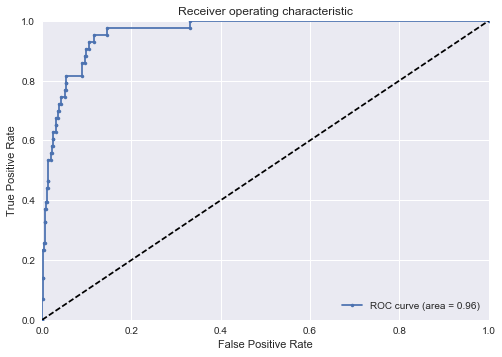

In [10]:
#ROC

# X are features and y is predictive variable - cancelled HD or not.
X = df_final[['balance', 'income', 'student']]
#y = df['y'].apply(lambda y : get_y(y))



# Scale columns for regression.
#scaler = StandardScaler()
#X = X.as_matrix().astype(np.float)
#X = scaler.fit_transform(X)

# Computes the AUC ROC of the classifier.
def generate_auc(X,y,clf_class,**kwargs):
    # Construct a kfolds object
    random_state = np.random.RandomState(0)
    # Construct training and testing set.
    X, y = shuffle(X, y, random_state=random_state)
    n_samples, n_features = X.shape
    half = int(n_samples/1.2)
    X_train, X_test = X[:half], X[half:]
    y_train, y_test = y[:half], y[half:]
    
    # Choose SVC classifier.
    classifier = clf_class(**kwargs)
    probas_ = classifier.fit(X_train, y_train).predict_proba(X_test)
    
    fpr, tpr, thresholds = roc_curve(y_test, probas_[:, 1])
    roc_auc = auc(fpr, tpr)
    print ("Area under the ROC curve : %f" % roc_auc)
    return fpr, tpr, roc_auc, thresholds

# Create linear regression object
alphas = np.logspace(-3,-1,30)

scores = []

for alpha in alphas:
    regr = LogisticRegression(C=alpha,penalty='l1')

    # Train the model using the training sets
    #regr.fit(X_train, y_train)
    fpr, tpr, roc_auc, thresholds= generate_auc(X,y,LogisticRegression,C=alpha,penalty='l1')
    scores.append(roc_auc)
plt.plot(alphas,scores)

# Generate ROC  for LR with l1 penalty and C=0.1
fpr,tpr,roc_auc, thresholds = generate_auc(X,y,LogisticRegression,C=0.1,penalty='l1')
def generate_ROCplot(fpr,tpr,label,roc_auc):
    plt.clf()
    plt.plot(fpr, tpr, '.-',label='ROC curve (area = %0.2f)' % roc_auc)
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.0])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic')
    plt.legend(loc="lower right")
    plt.show()
    
# Plots ROC
generate_ROCplot(fpr,tpr,'LR',roc_auc)

/Users/jingyayan/anaconda/lib/python3.6/site-packages/sklearn/utils/validation.py:526: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/jingyayan/anaconda/lib/python3.6/site-packages/ipykernel/__main__.py:18: FutureWarning: sort is deprecated, use sort_values(inplace=True) for INPLACE sorting


       coef     type
0 -0.000003  student
1  0.000408  balance
2 -0.000126   income
Adding the student variable makes little difference on ROC but big difference on the coefficients. Therefore, the student variable should be considered.


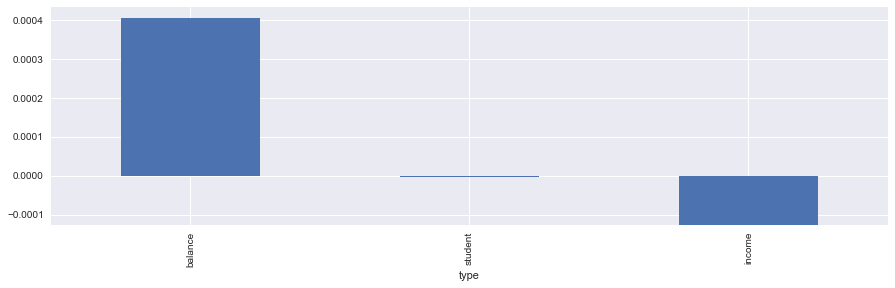

In [32]:
#coefficient


regr = LogisticRegression(C=alpha,penalty='l2')
df_data=df_final.drop(['default'],1)
# Train the model using the training sets


regr.fit(X, y)

dfCoeffs = pd.DataFrame({'type':df_data.columns.values, 'coef':regr.coef_[0]})


df_reduced = dfCoeffs[(dfCoeffs['coef']>0) | (dfCoeffs['coef']<0)]

plt.figure(figsize=(15,4))
dfCoeffs2 = df_reduced.groupby('type')['coef'].mean()
dfCoeffs2.sort()
dfCoeffs2[::-1].plot(kind='bar')
print (dfCoeffs)
print ('Adding the student variable makes little difference on ROC but big difference on the coefficients. Therefore, the student variable should be considered.')

6) Using cross validation, check that the model you built in 5) is robust (generalizes to other random folds of the dataset).

In [40]:
from sklearn.linear_model import Ridge
X= df_final[['balance', 'income', 'student']]
y=df_final['default']
#y = df['y'].apply(lambda y : get_y(y))

# K-fold cross validation for model selection.
def run_cv(X,y,clf_class,**kwargs):
    # Construct a kfolds object
    kf = KFold(len(y),n_folds=5,shuffle=True)
    y_pred = y.copy()
   
    # Iterate through folds
    for train_index, test_index in kf:
        X_train, X_test = X[train_index], X[test_index]
        y_train = y[train_index]
        # Initialize a classifier with key word arguments
        clf = clf_class(**kwargs)
        clf.fit(X_train,y_train)
        y_pred[test_index] = clf.predict(X_test)
    return y_pred

run_cv(X,y,LogisticRegression)
# print (y_pred=run_cv_coeffs(X,y,LogisticRegression,penalty='l1'))


IndexError: indices are out-of-bounds

7) Train a Decision Tree classifier with maximum depth 5 and plot the decision tree. How does performance compare?

In [15]:
import numpy as np
from sklearn.tree import DecisionTreeRegressor
import matplotlib.pyplot as plt
import numpy.random as nprnd
import random
import seaborn
%matplotlib inline

In [16]:
data = pd.concat([df_final[['balance','income','default']]],axis=1)
cols = data.shape[1]
X = data.iloc[:,0:cols-1]
y = data.iloc[:,cols-1:cols]
X = np.array(X.values)
y = np.array(y.values)
regr_0 = DecisionTreeRegressor(max_depth=1)
regr_1 = DecisionTreeRegressor(max_depth=2)
regr_2 = DecisionTreeRegressor(max_depth=5)
regr_0.fit(X, y)
regr_1.fit(X, y)
regr_2.fit(X, y)


DecisionTreeRegressor(criterion='mse', max_depth=5, max_features=None,
           max_leaf_nodes=None, min_impurity_split=1e-07,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, presort=False, random_state=None,
           splitter='best')

In [17]:
def visualize_tree(tree, feature_names):
    """Create tree png using graphviz.

    Args
    ----
    tree -- scikit-learn DecsisionTree.
    feature_names -- list of feature names.
    """
    with open("dt.dot", 'w') as f:
        export_graphviz(tree, out_file=f)

    command = ["dot", "-Tpng", "dt.dot", "-o", "dt.png"]
    try:
        subprocess.check_call(command)
    except:
        exit("Could not run dot, ie graphviz, to "
             "produce visualization")

In [18]:
from __future__ import print_function

import os
import subprocess

import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeClassifier, export_graphviz
dt=DecisionTreeRegressor(max_depth=5)
visualize_tree(regr_1, feature_names=['x'])

In [19]:
dot_data=export_graphviz(regr_2, out_file=None)
graph = pydotplus.graph_from_dot_data(dot_data)  
Image(graph.create_png())

NameError: name 'pydotplus' is not defined

8) Find the optimal decision tree depth and compute the AUC ROC. 

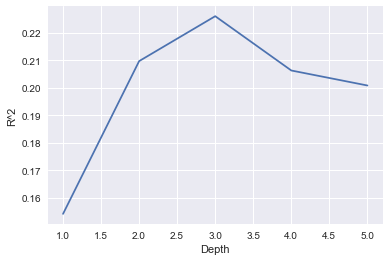

In [20]:
# Fit regression model
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42)
train_errors=[]
test_errors=[]
scores=[]
depths = range(1,6)
for n in depths:
    regr = DecisionTreeRegressor(max_depth=n)
    # Train the model using the training sets
    regr.fit(X_train, y_train)
    train_errors.append(regr.score(X_train,y_train))
    scores.append(regr.score(X_test,y_test))
plt.ylabel('R^2')
plt.xlabel('Depth')
plt.plot(depths,scores)
test_errors=scores
n_opt=depths[np.argmax(scores)]